# Importing necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Reading the dataset

In [2]:
data=pd.read_csv('weather_data.csv')
data.head(5)

,rain,visibility,wind_speed_180m,temperature_180m,Safety_status
0,0.000000,22547.620,27.525797,21.773237,Safe
1,0.000000,22547.620,27.525797,21.773237,Safe
2,0.000000,23186.904,22.999079,28.073574,Safe
3,0.011905,26040.238,23.307661,19.807930,Safe
4,0.012500,14156.429,18.064410,23.808216,Safe


In [3]:
data.tail(5)

,rain,visibility,wind_speed_180m,temperature_180m,Safety_status
69,2.63382,1341.76301,48.63037,-23.52462,Unsafe
70,8.69022,298.54026,51.99886,-13.71590,Unsafe
71,5.34077,42.89830,62.29364,-25.77783,Unsafe
72,7.38696,256.74198,54.51827,-28.84075,Unsafe
73,7.67269,772.61421,61.94358,-24.06730,Unsafe


# Acquiring details of the dataset

In [4]:
#number of rows and columns
print(data.shape)

#column names
print(data.columns)

(74, 5)
Index(['rain', 'visibility', 'wind_speed_180m', 'temperature_180m',
       'Safety_status'],
      dtype='object')


In [5]:
data.describe

<bound method NDFrame.describe of         rain   visibility  wind_speed_180m  temperature_180m Safety_status
0   0.000000  22547.62000        27.525797         21.773237          Safe
1   0.000000  22547.62000        27.525797         21.773237          Safe
2   0.000000  23186.90400        22.999079         28.073574          Safe
3   0.011905  26040.23800        23.307661         19.807930          Safe
4   0.012500  14156.42900        18.064410         23.808216          Safe
..       ...          ...              ...               ...           ...
69  2.633820   1341.76301        48.630370        -23.524620        Unsafe
70  8.690220    298.54026        51.998860        -13.715900        Unsafe
71  5.340770     42.89830        62.293640        -25.777830        Unsafe
72  7.386960    256.74198        54.518270        -28.840750        Unsafe
73  7.672690    772.61421        61.943580        -24.067300        Unsafe

[74 rows x 5 columns]>

# Checking for null values

In [6]:
data.isnull().sum()

rain                0
visibility          0
wind_speed_180m     0
temperature_180m    0
Safety_status       0
dtype: int64

# Exploratory Data Analysis (EDA)

# Histograms

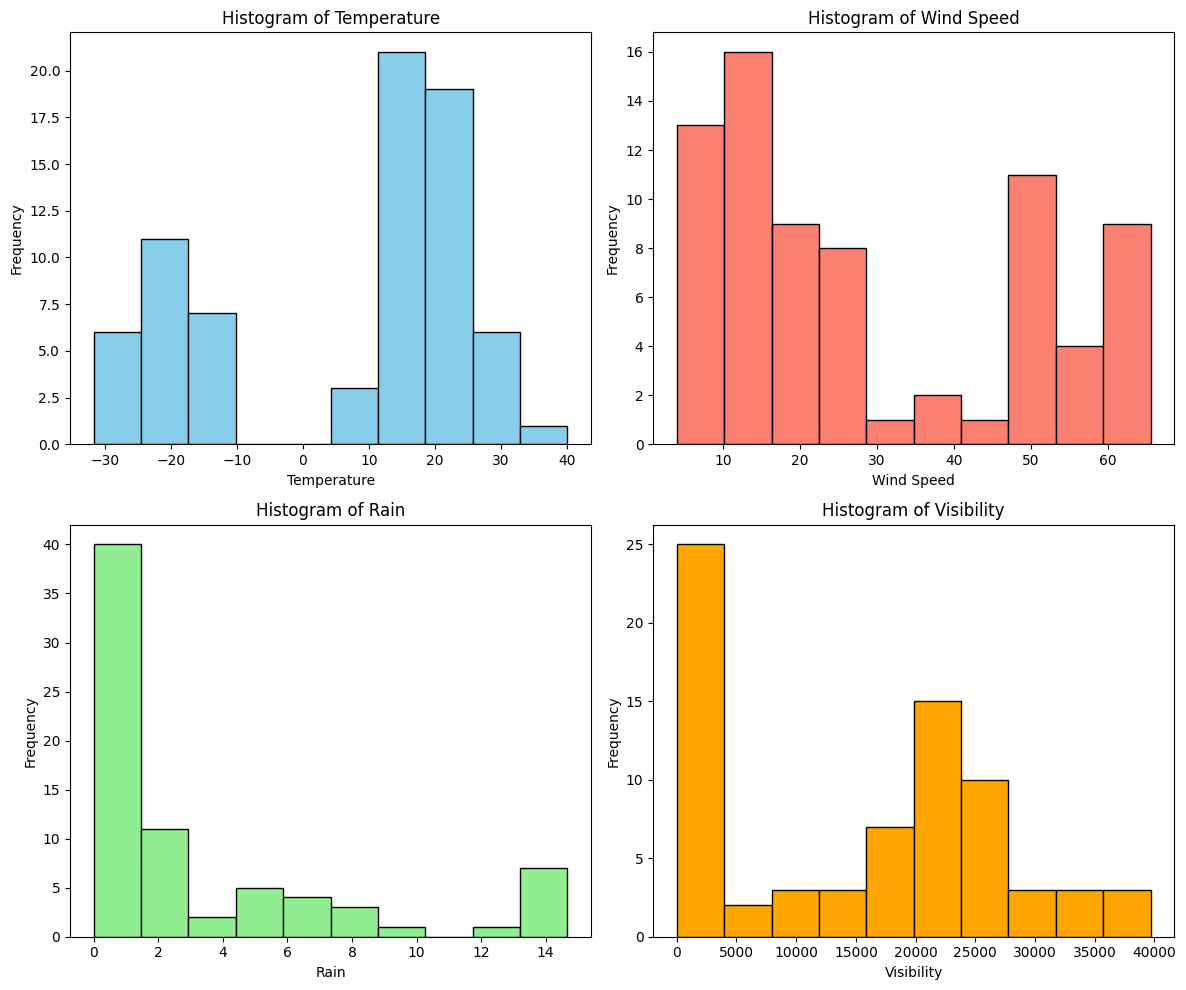

In [7]:
# Create histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for Temperature
axs[0, 0].hist(data['temperature_180m'], bins=10, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Histogram of Temperature')
axs[0, 0].set_xlabel('Temperature')
axs[0, 0].set_ylabel('Frequency')

# Histogram for Wind Speed
axs[0, 1].hist(data['wind_speed_180m'], bins=10, color='salmon', edgecolor='black')
axs[0, 1].set_title('Histogram of Wind Speed')
axs[0, 1].set_xlabel('Wind Speed')
axs[0, 1].set_ylabel('Frequency')

# Histogram for Rain
axs[1, 0].hist(data['rain'], bins=10, color='lightgreen', edgecolor='black')
axs[1, 0].set_title('Histogram of Rain')
axs[1, 0].set_xlabel('Rain')
axs[1, 0].set_ylabel('Frequency')

# Histogram for Visibility
axs[1, 1].hist(data['visibility'], bins=10, color='orange', edgecolor='black')
axs[1, 1].set_title('Histogram of Visibility')
axs[1, 1].set_xlabel('Visibility')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Box plots

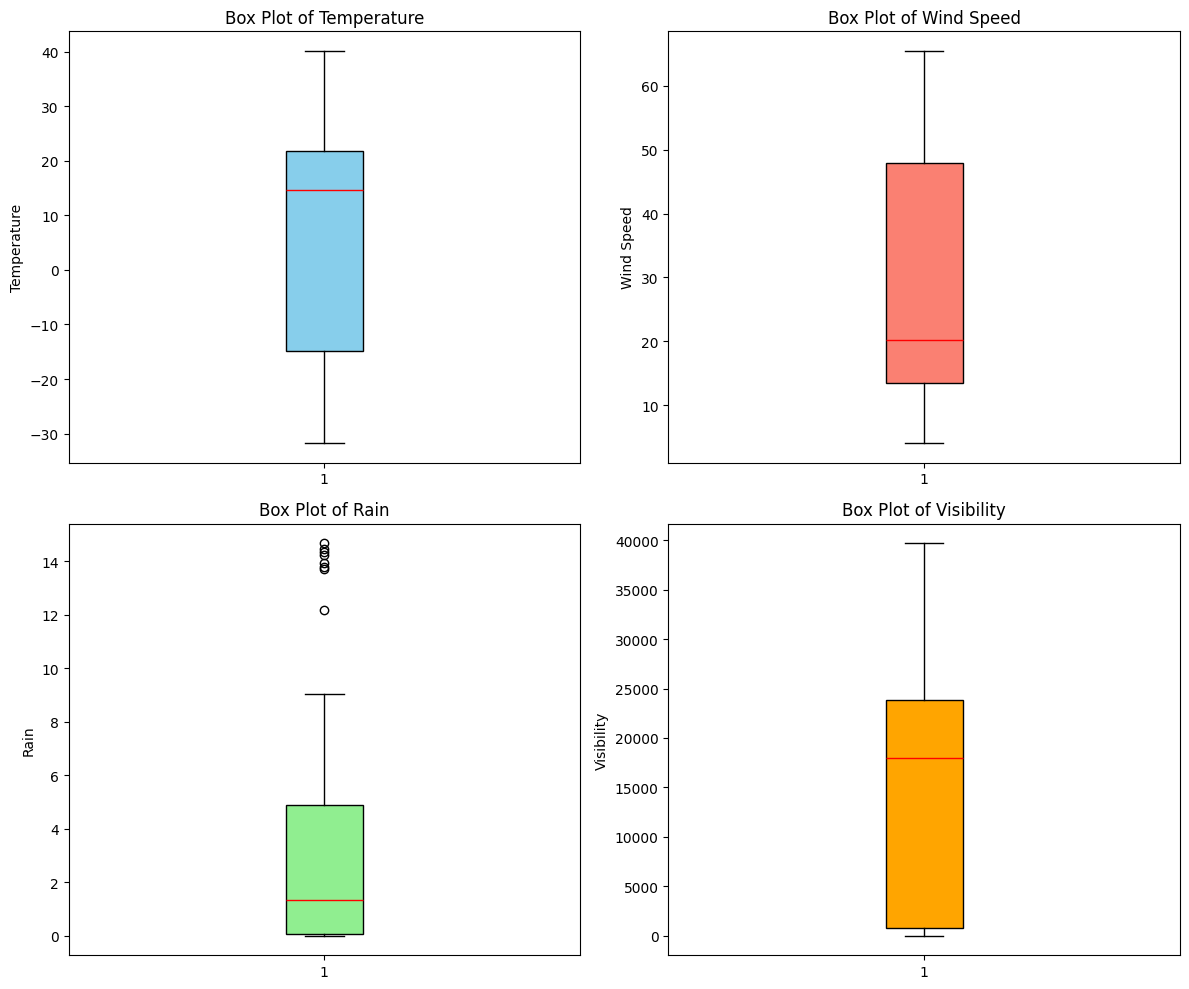

In [8]:
# Create box plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Box plot for Temperature
axs[0, 0].boxplot(data['temperature_180m'], patch_artist=True, 
                   boxprops=dict(facecolor='skyblue', color='black'),
                   whiskerprops=dict(color='black'),
                   capprops=dict(color='black'),
                   medianprops=dict(color='red'))
axs[0, 0].set_title('Box Plot of Temperature')
axs[0, 0].set_ylabel('Temperature')

# Box plot for Wind Speed
axs[0, 1].boxplot(data['wind_speed_180m'], patch_artist=True, 
                   boxprops=dict(facecolor='salmon', color='black'),
                   whiskerprops=dict(color='black'),
                   capprops=dict(color='black'),
                   medianprops=dict(color='red'))
axs[0, 1].set_title('Box Plot of Wind Speed')
axs[0, 1].set_ylabel('Wind Speed')

# Box plot for Rain
axs[1, 0].boxplot(data['rain'], patch_artist=True, 
                   boxprops=dict(facecolor='lightgreen', color='black'),
                   whiskerprops=dict(color='black'),
                   capprops=dict(color='black'),
                   medianprops=dict(color='red'))
axs[1, 0].set_title('Box Plot of Rain')
axs[1, 0].set_ylabel('Rain')

# Box plot for Visibility
axs[1, 1].boxplot(data['visibility'], patch_artist=True, 
                   boxprops=dict(facecolor='orange', color='black'),
                   whiskerprops=dict(color='black'),
                   capprops=dict(color='black'),
                   medianprops=dict(color='red'))
axs[1, 1].set_title('Box Plot of Visibility')
axs[1, 1].set_ylabel('Visibility')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Pair Plot (Scatter plot matrix)

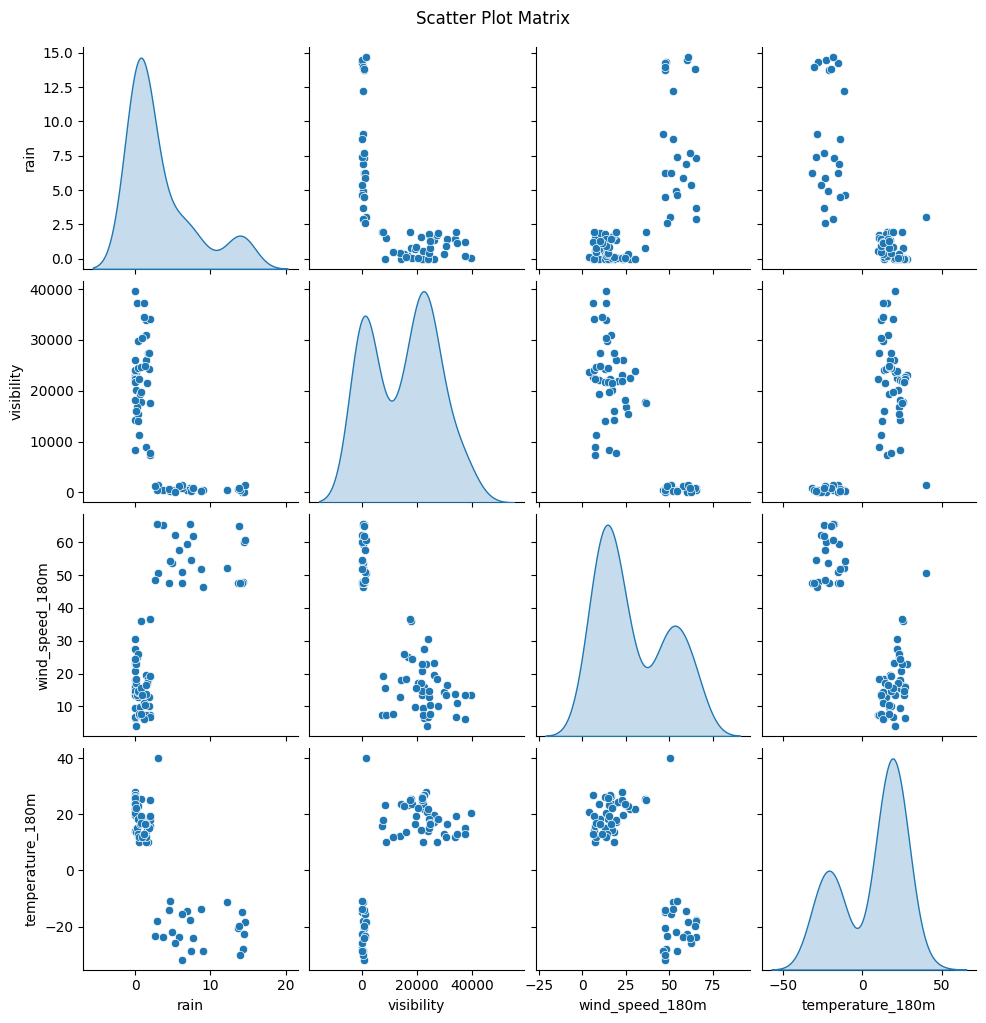

In [9]:
# Drop the column with string values
data_numeric = data.select_dtypes(include=[float, int])

# Create a scatter plot matrix (pair plot)
sns.pairplot(data_numeric, diag_kind='kde', markers='o', hue=None)

# Set title and labels
plt.suptitle('Scatter Plot Matrix', y=1.02)

# Show plot
plt.show()

# Line Plots

* shows the trends in variables over time

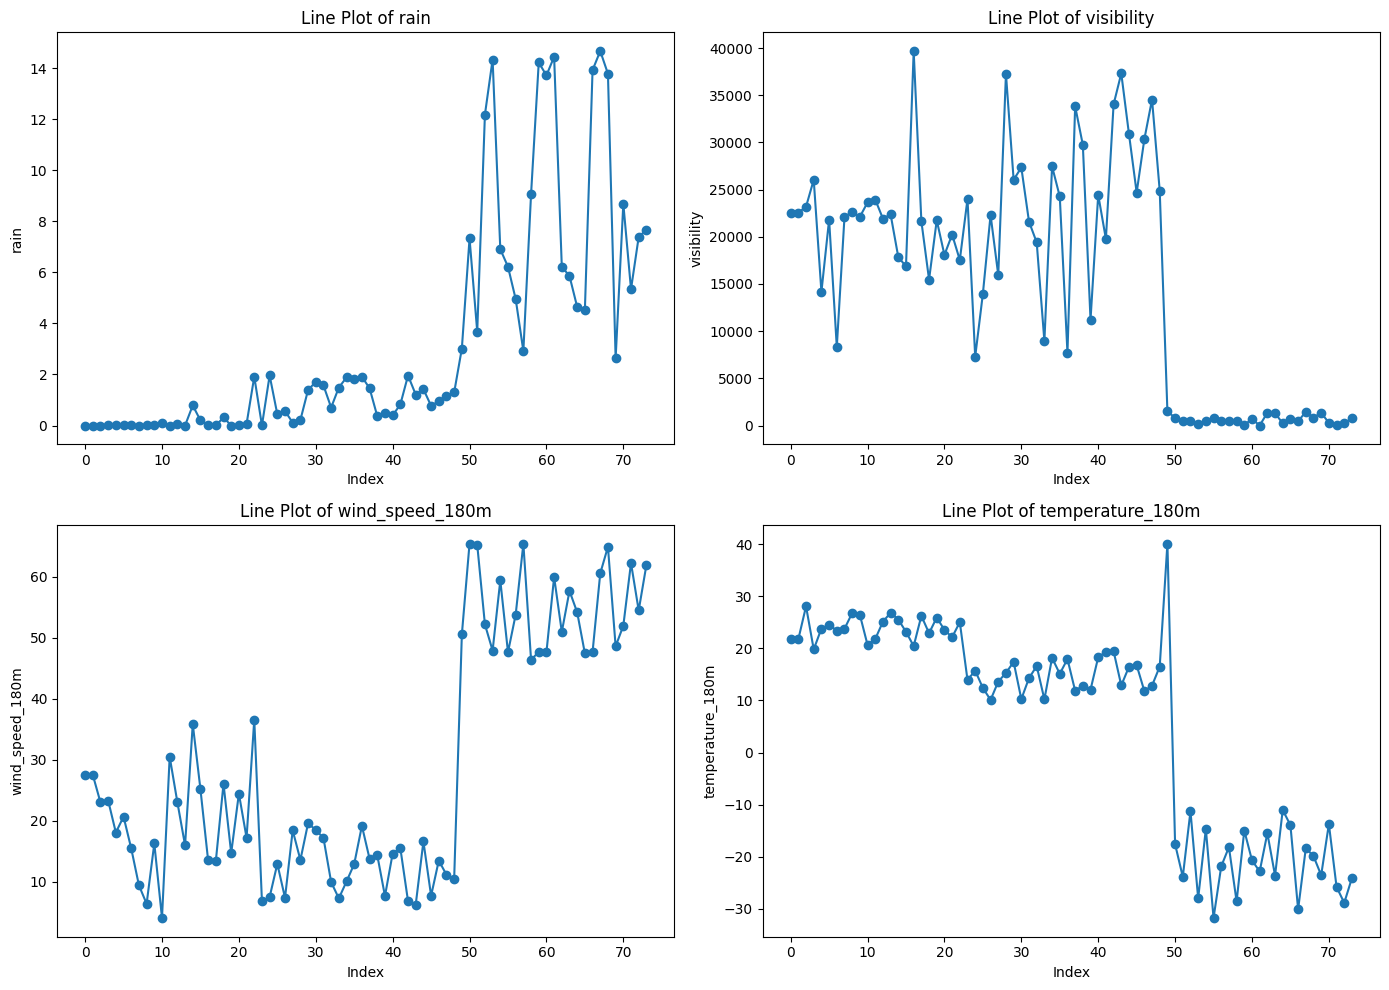

In [10]:
# Drop the column with string values
data_numeric = data.select_dtypes(include=[float, int])

# Create line plots for each numeric variable
plt.figure(figsize=(14, 10))

for i, column in enumerate(data_numeric.columns, start=1):
    plt.subplot(2, 2, i)
    plt.plot(data_numeric[column], marker='o', linestyle='-')
    plt.title(f'Line Plot of {column}')
    plt.xlabel('Index')
    plt.ylabel(column)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Density Plots

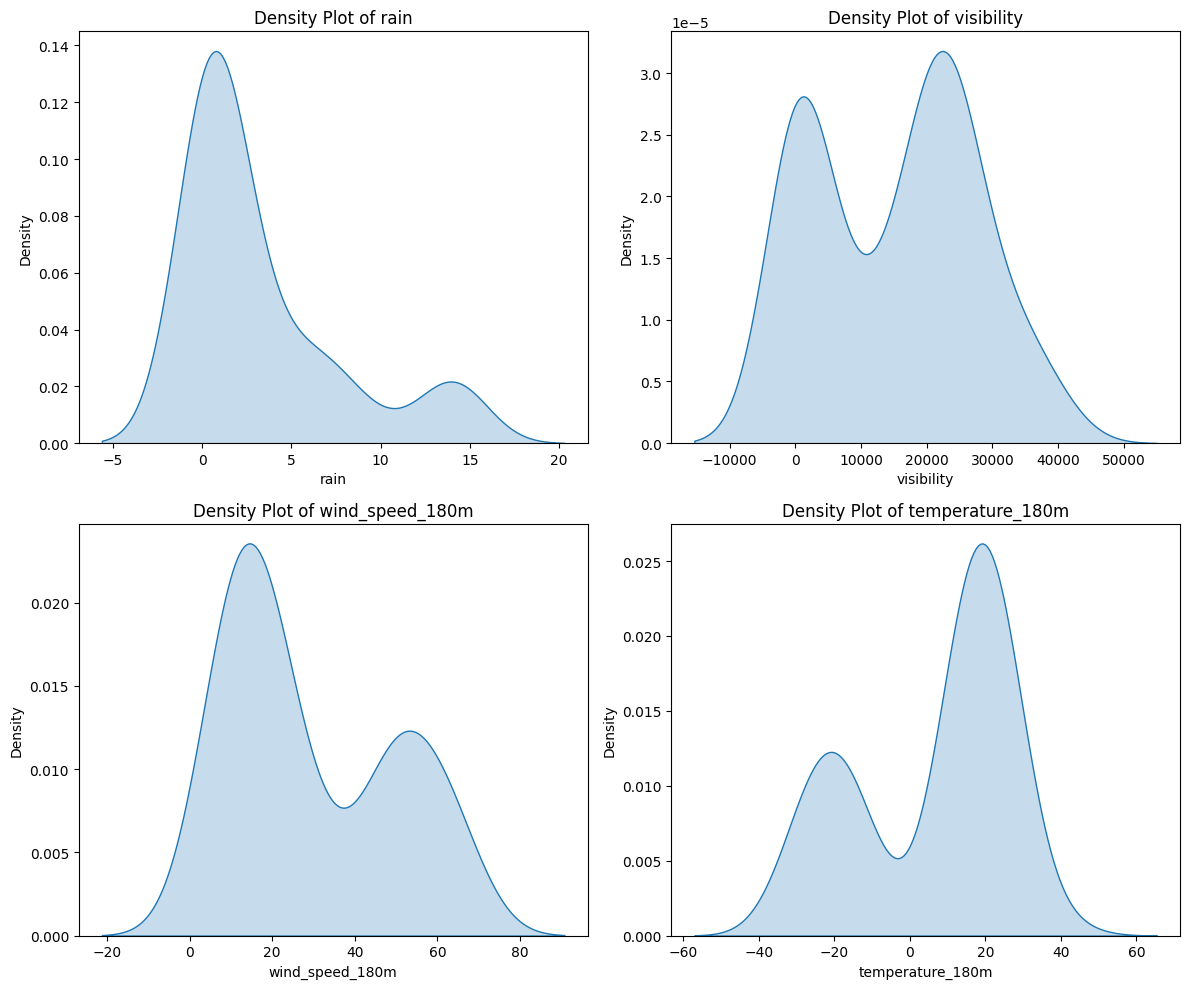

In [11]:
# Drop the column with string values
data_numeric = data.select_dtypes(include=[float, int])

# Create density plots for each numeric variable
plt.figure(figsize=(12, 10))

for i, column in enumerate(data_numeric.columns, start=1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data_numeric[column], fill=True)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# HeatMap

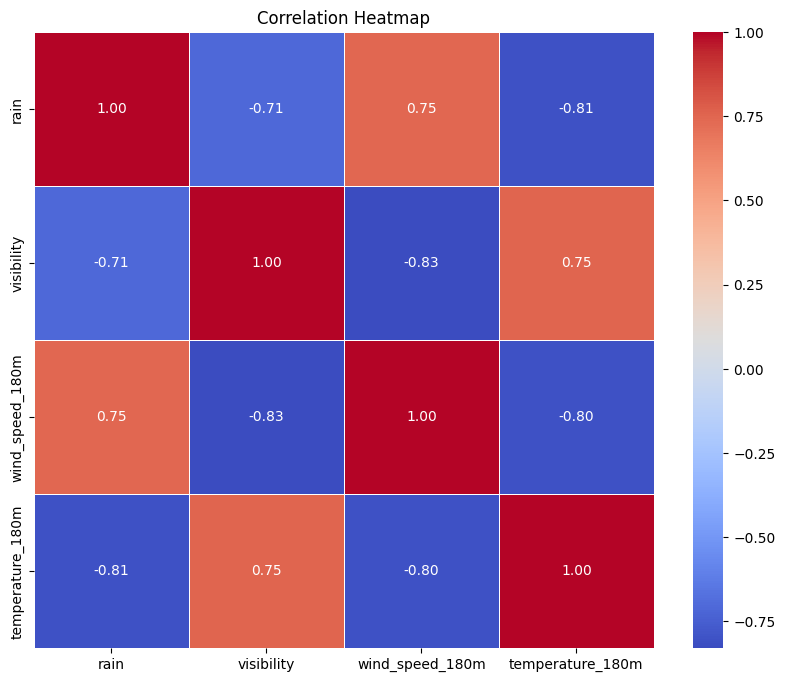

In [12]:
# Drop the column with string values
data_numeric = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = data_numeric.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set titles and labels
plt.title('Correlation Heatmap')
plt.show()

# Logistic Regression Model

Importing necessary libraries

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [42]:
X = data[['rain', 'visibility', 'wind_speed_180m', 'temperature_180m']]
y = data['Safety_status']

print(y.isna().sum())
y = y.dropna()
X = X.loc[y.index] 

0


Preprocess the data

In [43]:


# Encode target variable if it's not numeric
y = y.map({'Safe': 0, 'Unsafe': 1})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model with balanced class weights
clf = LogisticRegression(class_weight='balanced', random_state=42)

Training the model

In [44]:

# Train the model
clf.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

Making predictions and evaluating the model

In [45]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

feature_importance = np.abs(clf.coef_).flatten()
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Confusion Matrix:
 [[10  0]
 [ 0  5]]


Testing the model on new data

In [52]:
# New data point: [Rain, Visibility, Wind Speed (180m), Temperature (180m)]
new_data = np.array([[0.0, 1000, 30.0, -40.0]])

# Standardize the new data (use the same scaler from training)
new_data_scaled = scaler.transform(new_data)

# Predict using the logistic regression model
prediction = model.predict(new_data_scaled)

# Convert prediction to Safe/Unsafe label
status = 'Safe' if prediction[0] == 0 else 'Unsafe'
print(f'The predicted flight safety status is: {status}')

# (Optional) Print probability scores
probability = model.predict_proba(new_data_scaled)
print(f'Probability of Safe: {probability[0][0]:.2f}, Probability of Unsafe: {probability[0][1]:.2f}')

The predicted flight safety status is: Unsafe
Probability of Safe: 0.25, Probability of Unsafe: 0.75


# Observation

An accuracy of 1.0 in the report suggests that the model made correct predictions for all instances in the test set, but this doesn't necessarily mean the model is perfect. Several factors could lead to an accuracy of 1.0, but the model may still have limitations:

1.Small Test Set:
    If your test set is small, it's easier for the model to achieve perfect accuracy by chance.

2.Overfitting:
    The model might have overfitted to the training data, meaning it performs well on the test set but may not generalize to new, unseen data.

3.Unbalanced Test Set:
        If the test set has mostly Safe cases and only a few Unsafe cases, the model might achieve high accuracy by predicting the majority class (Safe) correctly.